# Análise da diferença salarial para trabalhadores de TI conforme a escolaridade de cada indivíduo.

Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres
com funções trabalhistas de TI distribuídos em qualquer setor produtivo no Brasil, 
conforme a escolaridade de cada indivíduo em um recorte de 2009 e 2019.

## Etapas iniciais para realização das análises:

### Imports necessários para realização dos processamentos e análises:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [14]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
escol = {5: 'Fundamental Completo', 7: 'Médio Completo', 9: 'Superior Completo', 10: 'Mestrado', 11: 'Doutorado'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

# Faixas de idades: 18 - 24 # 25 - 30 # 31 - 40 # 41 - 50 # 51 - 90
replace_values_faixas = {(18, 19, 20, 21, 22, 23, 24): '18 - 24',
                  (25, 26, 27, 28, 29, 30): '25 - 30',
                  (31, 32, 33, 34, 35, 36, 37, 38, 39, 40): '31 - 40',
                  (41, 42, 43, 44, 45, 46, 47, 48, 49, 50): '41 - 50',
                  (51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
                   71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90): '51 - 90'}

### Etapa de leitura dos dados das tabelas em CSV para 2009 e 2019:

In [15]:
# Leitura da tabela de dados gerais para 2009:
RAIS_GERAL_2009 = pd.read_csv("../data/DATA_RAIS_GERAL_2009.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2009.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [16]:
# Leitura da tabela de dados gerais para 2019:
RAIS_GERAL_2019 = pd.read_csv("../data/DATA_RAIS_GERAL_2019.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2019.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de escolaridade para utilização correta:

In [17]:
# Retirando dados referentes a indivíduos com menos de 18:
RAIS_GERAL_2009 = RAIS_GERAL_2009[RAIS_GERAL_2009['Idade'] >= 18]
RAIS_GERAL_2019 = RAIS_GERAL_2019[RAIS_GERAL_2019['Idade'] >= 18]

# Retirando dados referentes a indivíduos com mais de 90:
RAIS_GERAL_2009 = RAIS_GERAL_2009[RAIS_GERAL_2009['Idade'] <= 90]
RAIS_GERAL_2019 = RAIS_GERAL_2019[RAIS_GERAL_2019['Idade'] <= 90]

In [18]:
# Substituição dos valores de cada idade pelas faixas definidas:

RAIS_GERAL_2009['Idade'].replace(replace_values_faixas, inplace = True)
RAIS_GERAL_2019['Idade'].replace(replace_values_faixas, inplace = True)

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [19]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2009 (data dos dados para 2009) 
# até 04/2022 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2009 = 2.14068130

RAIS_GERAL_2009["Remuneração"] = RAIS_GERAL_2009["Remuneração"] * fator_correcao_inflacao_2009

# Índice de correção de inflação para o período de 12/2019 (data dos dados para 2019) 
# até 04/2022 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2019 = 1.22858430

RAIS_GERAL_2019["Remuneração"] = RAIS_GERAL_2019["Remuneração"] * fator_correcao_inflacao_2019

### Exibição das tabelas gerais para cada ano:

In [20]:
# Exibindo os cinco primeiros dados da tabela de 2009:
RAIS_GERAL_2009.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,AC,317205,73114,2,18 - 24,02,"1,498.48",1
1,AC,317205,73114,2,25 - 30,02,"2,140.68",1
2,AC,317205,47717,2,31 - 40,02,"2,140.68",1
3,AC,212420,47512,4,25 - 30,08,"2,354.75",1
4,AC,142530,47814,6,31 - 40,08,"1,806.35",1


In [21]:
# Exibindo os cinco primeiros dados da tabela de 2009:
RAIS_GERAL_2019.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,212405,72100,1,18 - 24,8,"2,554.23",1
1,MS,212405,10996,1,31 - 40,2,"2,242.77",1
2,MS,317210,84116,2,25 - 30,8,"1,626.51",1
3,MS,212415,47440,3,31 - 40,8,"5,580.60",1
4,MS,317210,62031,3,31 - 40,9,"1,847.79",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme a escolaridade de cada indivíduo:

### Criação das tabelas para relatório e tabela para formação do gráfico:

In [22]:
# Tabela principal para quantidade em 2009:
RAIS_GERAL_2009_QNT = pd.crosstab(RAIS_GERAL_2009["Idade"], RAIS_GERAL_2009["Sexo"].replace(sexo))
RAIS_GERAL_2009_QNT.insert(1, "% Fem.", RAIS_GERAL_2009_QNT["Fem."] / (RAIS_GERAL_2009_QNT["Fem."] + RAIS_GERAL_2009_QNT["Masc."]) * 100)
RAIS_GERAL_2009_QNT.insert(3, "% Masc.", RAIS_GERAL_2009_QNT["Masc."] / (RAIS_GERAL_2009_QNT["Fem."] + RAIS_GERAL_2009_QNT["Masc."]) * 100)

In [23]:
RAIS_GERAL_2009_QNT

Sexo,Fem.,% Fem.,Masc.,% Masc.
Idade,,,,
18 - 24,14488,20.50,56176,79.50
25 - 30,25328,21.48,92571,78.52
31 - 40,30493,27.20,81617,72.80
41 - 50,21454,33.58,42438,66.42
51 - 90,10132,35.45,18449,64.55


In [24]:
# Tabela principal para quantidade em 2019:
RAIS_GERAL_2019_QNT = pd.crosstab(RAIS_GERAL_2019["Idade"], RAIS_GERAL_2019["Sexo"].replace(sexo))
RAIS_GERAL_2019_QNT.insert(1, "% Fem.", RAIS_GERAL_2019_QNT["Fem."] / (RAIS_GERAL_2019_QNT["Fem."] + RAIS_GERAL_2019_QNT["Masc."]) * 100)
RAIS_GERAL_2019_QNT.insert(3, "% Masc.", RAIS_GERAL_2019_QNT["Masc."] / (RAIS_GERAL_2019_QNT["Fem."] + RAIS_GERAL_2019_QNT["Masc."]) * 100)

In [25]:
RAIS_GERAL_2019_QNT

Sexo,Fem.,% Fem.,Masc.,% Masc.
Idade,,,,
18 - 24,15172,20.78,57838,79.22
25 - 30,28856,20.47,112082,79.53
31 - 40,44201,19.99,176915,80.01
41 - 50,25589,25.91,73188,74.09
51 - 90,15268,30.54,34720,69.46


In [26]:
# Tabela para gráfico da quantidade em 2009:
RAIS_GERAL_2009_QNT.insert(4, "Total", RAIS_GERAL_2009_QNT["% Masc."] + RAIS_GERAL_2009_QNT["% Fem."])
RAIS_GERAL_2009_QNT.insert(5, "Ano", "2009")

# Tabela para gráfico da quantidade em 2019:
RAIS_GERAL_2019_QNT.insert(4, "Total", RAIS_GERAL_2019_QNT["% Masc."] + RAIS_GERAL_2019_QNT["% Fem."])
RAIS_GERAL_2019_QNT.insert(5, "Ano", "2019")

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2009_QNT, RAIS_GERAL_2019_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:

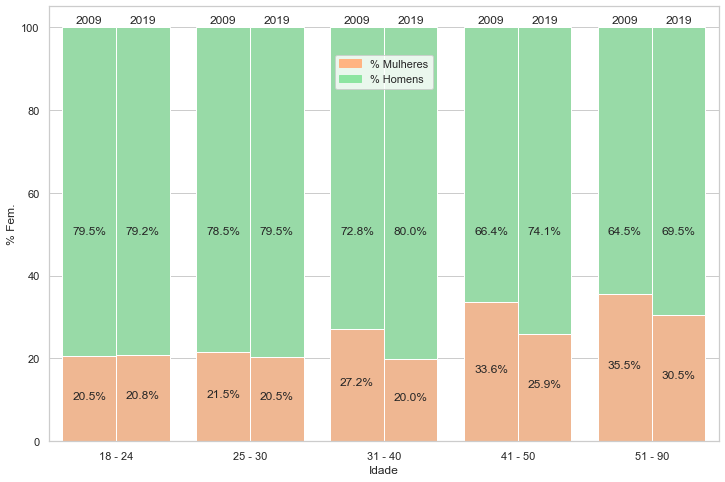

In [27]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize = (12, 8))

# Configuração da grid da imagem:
sns.set(style = "whitegrid")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x = "Idade", y = "Total", hue = "Ano", data = RAIS_GERAL_QNT_GRAF, palette = {"2009": color_masc,"2019": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."][i]), (x, y), ha='center')

# Escrita do valor do ano para cada barra em dupla:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+1
    bar1.annotate('{}'.format(RAIS_GERAL_QNT_GRAF["Ano"][i]), (x, y), ha='center')

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x = "Idade", y = "% Fem.", hue = "Ano", data = RAIS_GERAL_QNT_GRAF, palette = {"2009": color_fem,"2019": color_fem})

# Captura das barras recém criadas:
patches = bar2.patches[10:]

# Escrita da porcentagem para cada barra capturada das mulheres:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar2.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Fem."][i]), (x, y), ha='center')

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color = color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color = color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc = 'center', bbox_to_anchor = (.45, .8, .1, .1))

plt.savefig("./figures/svg/qnt_sexo_idade.svg")

## Análise das médias salariais e diferenças:

### Distribuição da remuneração para cada sexo cruzado pela escolaridade:

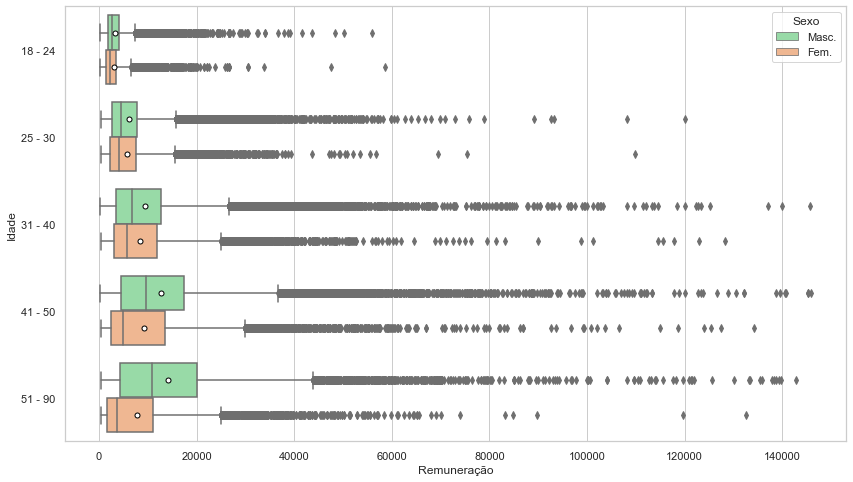

In [28]:
RAIS_GERAL_2009_BOX = RAIS_GERAL_2009.copy()
RAIS_GERAL_2009_BOX["Sexo"].replace(sexo, inplace = True)

box = sns.boxplot(x = 'Remuneração', y = 'Idade', hue = 'Sexo', data = RAIS_GERAL_2009_BOX, orient = 'h', showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = replace_values_faixas.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_idade_2009.png", dpi = 300)

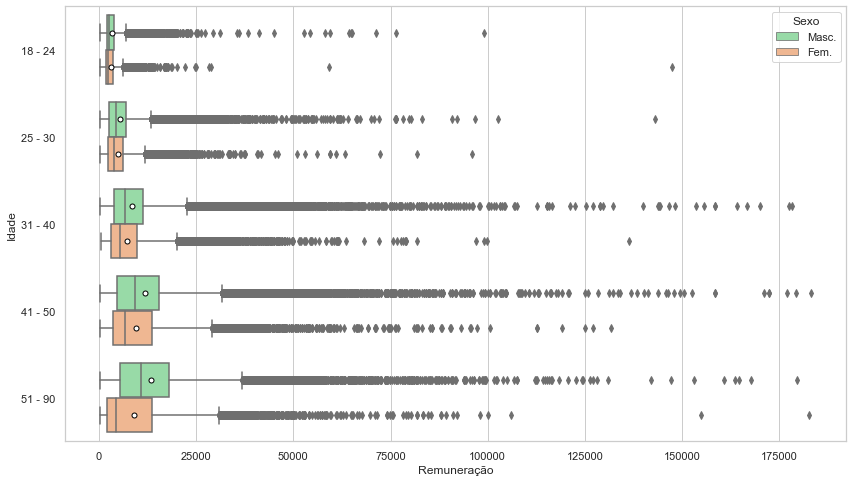

In [29]:
RAIS_GERAL_2019_BOX = RAIS_GERAL_2019.copy()
RAIS_GERAL_2019_BOX["Sexo"].replace(sexo, inplace = True)

box = sns.boxplot(x = 'Remuneração', y = 'Idade', hue = 'Sexo', data = RAIS_GERAL_2019_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = replace_values_faixas.values(),
                        palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_idade_2019.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:

In [30]:
# Tabela principal para média e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIA = pd.crosstab(RAIS_GERAL_2009["Idade"], RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2009_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2009_MEDIA["Fem."] - RAIS_GERAL_2009_MEDIA["Masc."]) / RAIS_GERAL_2009_MEDIA["Masc."]) * 100)

RAIS_GERAL_2009_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"3,001.87","3,329.90",-9.85
25 - 30,"5,701.03","6,089.61",-6.38
31 - 40,"8,317.54","9,372.58",-11.26
41 - 50,"9,174.78","12,658.92",-27.52
51 - 90,"7,865.27","14,127.93",-44.33


In [31]:
# Tabela principal para média e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIA = pd.crosstab(RAIS_GERAL_2019["Idade"], RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2019_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2019_MEDIA["Fem."] - RAIS_GERAL_2019_MEDIA["Masc."]) / RAIS_GERAL_2019_MEDIA["Masc."]) * 100)

RAIS_GERAL_2019_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"2,991.59","3,305.04",-9.48
25 - 30,"4,806.73","5,492.89",-12.49
31 - 40,"7,263.01","8,567.34",-15.22
41 - 50,"9,606.46","11,713.55",-17.99
51 - 90,"9,124.87","13,467.98",-32.25


In [32]:
RAIS_GERAL_2009_MEDIA.insert(3, "Ano", "2009")
RAIS_GERAL_2019_MEDIA.insert(3, "Ano", "2019")
RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2009_MEDIA, RAIS_GERAL_2019_MEDIA]).reset_index()

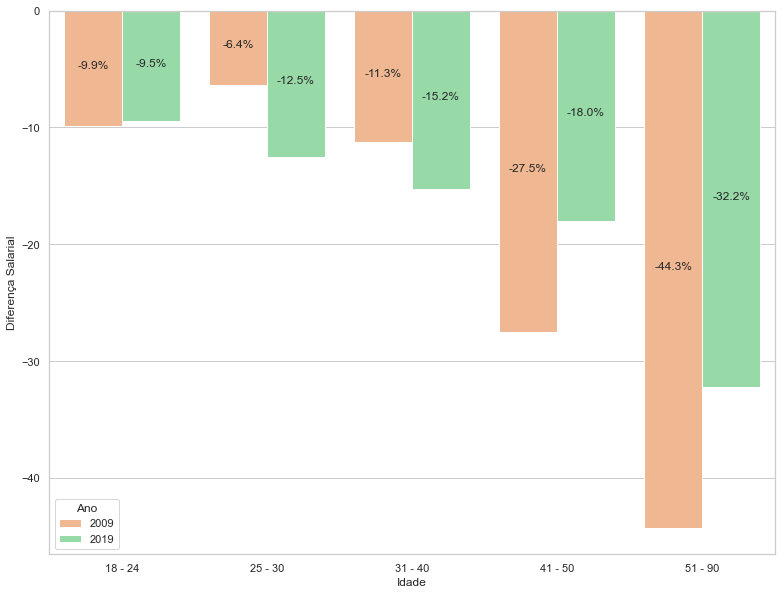

In [33]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Idade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2009": color_fem,"2019": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Prenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("./figures/png/dif_salarial_sexo_idade_media.png", dpi = 300)

In [34]:
# Tabela principal para mediana e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIANA = pd.crosstab(RAIS_GERAL_2009["Idade"], RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'median')
RAIS_GERAL_2009_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2009_MEDIANA["Fem."] - RAIS_GERAL_2009_MEDIANA["Masc."]) / RAIS_GERAL_2009_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2009_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"2,247.72","2,607.94",-13.81
25 - 30,"4,060.31","4,481.97",-9.41
31 - 40,"5,665.53","6,833.35",-17.09
41 - 50,"4,897.34","9,676.73",-49.39
51 - 90,"3,631.69","10,944.94",-66.82


In [35]:
# Tabela principal para média e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIANA = pd.crosstab(RAIS_GERAL_2019["Idade"], RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'median')
RAIS_GERAL_2019_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2019_MEDIANA["Fem."] - RAIS_GERAL_2019_MEDIANA["Masc."]) / RAIS_GERAL_2019_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2019_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"2,384.01","2,589.04",-7.92
25 - 30,"3,723.63","4,300.05",-13.40
31 - 40,"5,376.30","6,711.49",-19.89
41 - 50,"6,689.06","9,195.52",-27.26
51 - 90,"4,295.59","10,733.76",-59.98


In [36]:
RAIS_GERAL_2009_MEDIANA.insert(3, "Ano", "2009")

RAIS_GERAL_2019_MEDIANA.insert(3, "Ano", "2019")

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2009_MEDIANA, RAIS_GERAL_2019_MEDIANA]).reset_index()

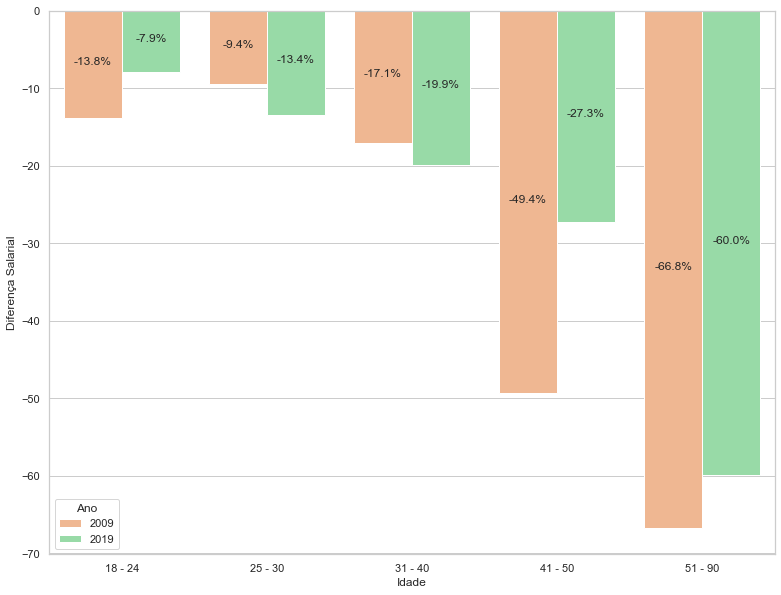

In [37]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Idade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2009": color_fem,"2019": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Prenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("./figures/png/dif_salarial_sexo_idade_mediana.png", dpi = 300)

### Teste de hipótese para cada grupo de médias por CBOs:

In [38]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [39]:
RAIS_GERAL_2009.query("Sexo == 1")

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,AC,317205,73114,2,18 - 24,02,"1,498.48",1
1,AC,317205,73114,2,25 - 30,02,"2,140.68",1
2,AC,317205,47717,2,31 - 40,02,"2,140.68",1
3,AC,212420,47512,4,25 - 30,08,"2,354.75",1
4,AC,142530,47814,6,31 - 40,08,"1,806.35",1
...,...,...,...,...,...,...,...,...
393812,TO,212420,10112,9,25 - 30,08,"6,949.19",1
393813,TO,212410,61108,9,51 - 90,08,"13,841.32",1
393814,TO,212410,61108,9,25 - 30,08,"5,000.63",1
393815,TO,123605,84230,11,31 - 40,{ñ,"16,891.60",1


In [40]:
TESTE_HIP_2009 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for idade in replace_values_faixas:
    df1 = RAIS_GERAL_2009.query("Sexo == 1").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração
    df2 = RAIS_GERAL_2009.query("Sexo == 2").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2009.loc[replace_values_faixas[idade]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2009_HIP = pd.merge(RAIS_GERAL_2009_MEDIANA, TESTE_HIP_2009, left_index=True, right_index=True)
RAIS_GERAL_2009_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2009_HIP.head()

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Idade,,,,,
18 - 24,"2,247.72","2,607.94",354320520.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
25 - 30,"4,060.31","4,481.97",1083215739.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
31 - 40,"5,665.53","6,833.35",1121872815.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
41 - 50,"4,897.34","9,676.73",343971960.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
51 - 90,"3,631.69","10,944.94",58263182.5,0.01 > 0.00000...,Medianas estatisticamente diferentes


In [41]:
TESTE_HIP_2019 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for idade in replace_values_faixas:
    df1 = RAIS_GERAL_2019.query("Sexo == 1").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração
    df2 = RAIS_GERAL_2019.query("Sexo == 2").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração
    
    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2019.loc[replace_values_faixas[idade]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2019_HIP = pd.merge(RAIS_GERAL_2019_MEDIANA, TESTE_HIP_2019, left_index=True, right_index=True)
RAIS_GERAL_2019_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2019_HIP.head()

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Idade,,,,,
18 - 24,"2,384.01","2,589.04",394155908.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
25 - 30,"3,723.63","4,300.05",1440104817.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
31 - 40,"5,376.30","6,711.49",3368204323.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
41 - 50,"6,689.06","9,195.52",784819549.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
51 - 90,"4,295.59","10,733.76",184497483.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
